Partie 1 : collect des données

Importation des pakages

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


Importation du fichier CSV

In [112]:
# chemin vers le fichier csv
df = pd.read_csv("C:/Users/Khalil/Documents/ProjetDataDiabete/DataPredDiabete/diabete.csv")
df

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Affichage des 10 premières lignes

In [113]:
pd.set_option('display.max_rows',10)
df

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Vérification des informations du DataFrame

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   n_pregnant  768 non-null    int64  
 1   glucose     768 non-null    int64  
 2   tension     768 non-null    int64  
 3   thickness   768 non-null    int64  
 4   insulin     768 non-null    int64  
 5   bmi         768 non-null    float64
 6   pedigree    768 non-null    float64
 7   age         768 non-null    int64  
 8   diabete     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Partie 2 : Nettoyage des données

Vérification des valeurs manquantes

In [115]:
df.isnull().sum().sort_values(ascending=False)

n_pregnant    0
glucose       0
tension       0
thickness     0
insulin       0
bmi           0
pedigree      0
age           0
diabete       0
dtype: int64

Statistiques descriptives

In [116]:
df.describe()

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Renommage des colonnes

In [117]:

df = pd.read_csv("C:/Users/Khalil/Documents/ProjetDataDiabete/DataPredDiabete/diabete.csv")
# Renommer les colonnes
df = df.rename(columns={
     "n_pregnant": "nbr_grossesses",
    "thickness": "epaisseur_peau",
    "bmi": "IMC",
    "pedigree": "Coef_hereditaire",
  
})

# Vérification après modification des noms
print("Noms des colonnes après modification :")
print(df.columns)
# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
df.to_csv('C:/Users/Khalil/Documents/ProjetDataDiabete/DataPredDiabete/diabete_nettoye.csv', index=False)

Noms des colonnes après modification :
Index(['nbr_grossesses', 'glucose', 'tension', 'epaisseur_peau', 'insulin',
       'IMC', 'Coef_hereditaire', 'age', 'diabete'],
      dtype='object')


Vérification des doublons

In [118]:
duplicates = df.duplicated()
# Afficher les doublons
print("Lignes dupliquées :")
print(df[duplicates])
# Compter les doublons
num_duplicates = duplicates.sum()
print(f"Nombre de lignes dupliquées : {num_duplicates}")

Lignes dupliquées :
Empty DataFrame
Columns: [nbr_grossesses, glucose, tension, epaisseur_peau, insulin, IMC, Coef_hereditaire, age, diabete]
Index: []
Nombre de lignes dupliquées : 0


In [119]:
df = pd.read_csv("C:/Users/Khalil/Documents/ProjetDataDiabete/DataPredDiabete/diabete_nettoye.csv")
df

,nbr_grossesses,glucose,tension,epaisseur_peau,insulin,IMC,Coef_hereditaire,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Partie 3 : Exploration et Analyse des Données


Spécification de la cible (diabète)


In [120]:
# Définir la colonne cible (target) et les facteurs 
target = df["diabete"]  # Colonne cible
facteur = df.drop(columns=["diabete"])  # Toutes les autres colonnes
# Affichage des résultats
print("Colonne cible (target) :")
display(target)
print("\nFacteurs:")
display(facteur)

Colonne cible (target) :


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabete, Length: 768, dtype: int64


Facteurs:


,nbr_grossesses,glucose,tension,epaisseur_peau,insulin,IMC,Coef_hereditaire,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Analyse de la variable cible

In [121]:
#on va commencer pa le variable target
target.value_counts()

diabete
0    500
1    268
Name: count, dtype: int64

Calcul des proportions des classes

In [122]:
class_counts = target.value_counts(normalize=True)
diabetes_yes = class_counts.get(1, 0)  # Proportion de la classe 1 (diabète présent)
diabetes_no = class_counts.get(0, 0)  # Proportion de la classe 0 (diabète absent)

# Affichage des proportions avec formatage
print(f'Proportion des patients atteints de diabète : {diabetes_yes:.2%}')
print(f'Proportion des patients non atteints de diabète : {diabetes_no:.2%}')

Proportion des patients atteints de diabète : 34.90%
Proportion des patients non atteints de diabète : 65.10%


Diagramme circulaire des proportions

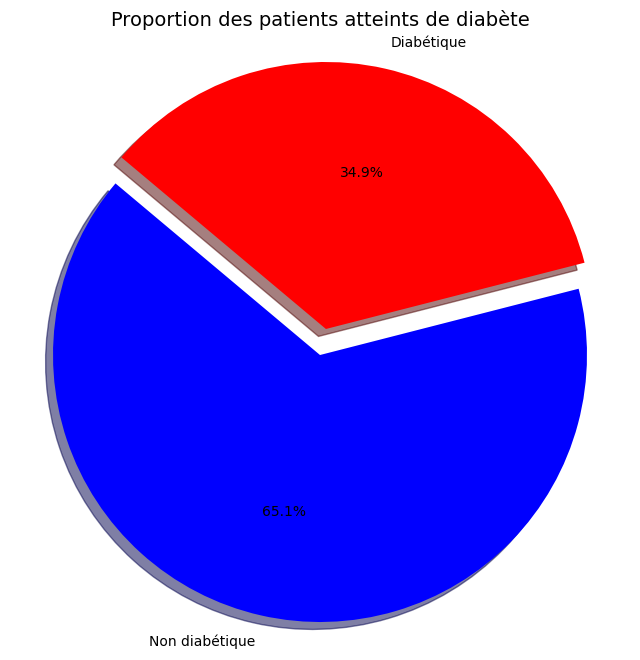

In [123]:
# Préparation des données pour le diagramme circulaire
labels = ['Non diabétique', 'Diabétique']
sizes = [diabetes_no * 100, diabetes_yes * 100]  # Convertir les proportions en pourcentages
colors = ['blue', 'red']  # Couleurs pour le diagramme circulaire
explode = (0.1, 0)  # Exploser la première tranche pour la mettre en évidence

# Création du diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Ajout d'un titre au diagramme circulaire
plt.title("Proportion des patients atteints de diabète", fontsize=14)

# Assure que le diagramme circulaire est un cercle
plt.axis('equal')

# Affichage du diagramme circulaire
plt.show()

Histogrammes des variables pour les personnes diabétiques

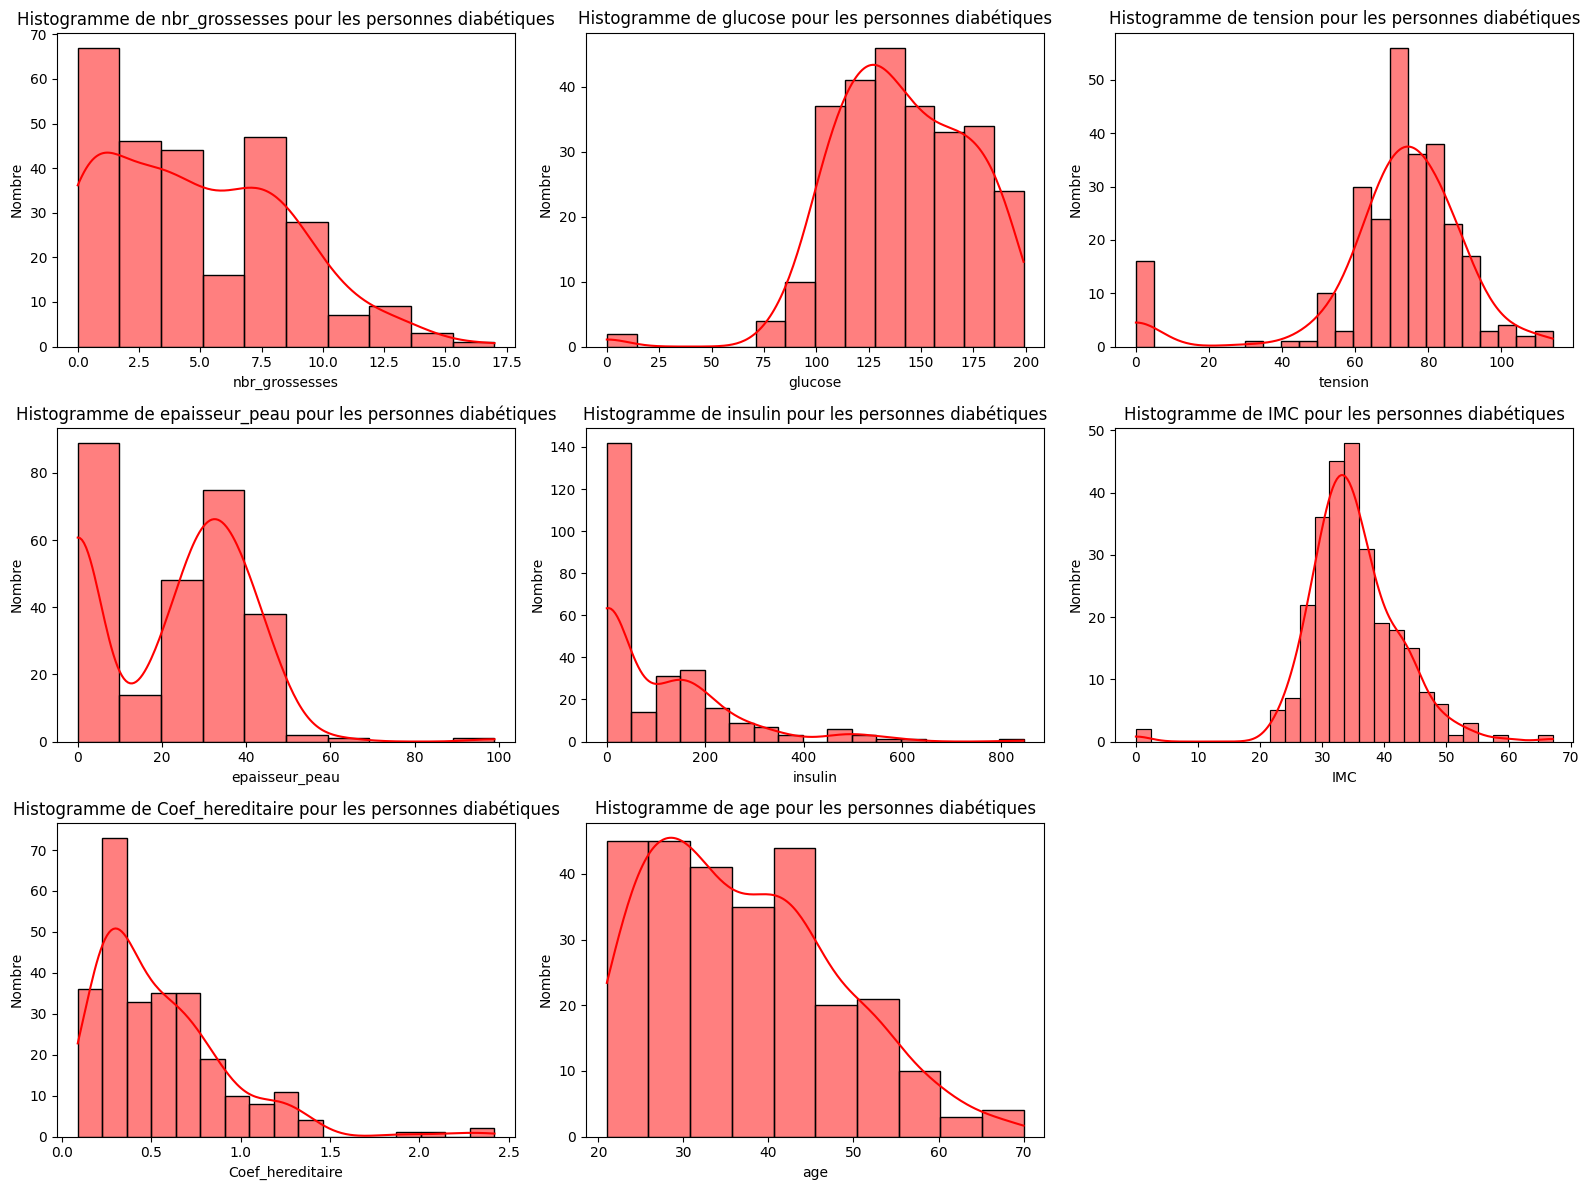

In [124]:
# Définition des colonnes à tracer
variables = ['nbr_grossesses', 'glucose', 'tension', 'epaisseur_peau',
             'insulin', 'IMC', 'Coef_hereditaire', 'age']

# Filtrer les données pour les personnes atteintes de diabète
df_diabete = df[df['diabete'] == 1]  # Sélection des cas où 'diabete' == 1

# Configuration des graphiques avec matplotlib
plt.figure(figsize=(16, 12))  # Taille de la figure

# Boucle pour créer un histogramme pour chaque variable
for i, column in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # Crée une grille 3x3 pour les sous-graphiques
    sns.histplot(data=df_diabete, x=column, kde=True, color='red')  # Histogramme filtré
    plt.title(f'Histogramme de {column} pour les personnes diabétiques')
    plt.xlabel(column)
    plt.ylabel('Nombre')

# Ajuster l'affichage
plt.tight_layout()
plt.show()

Matrice de corrélation

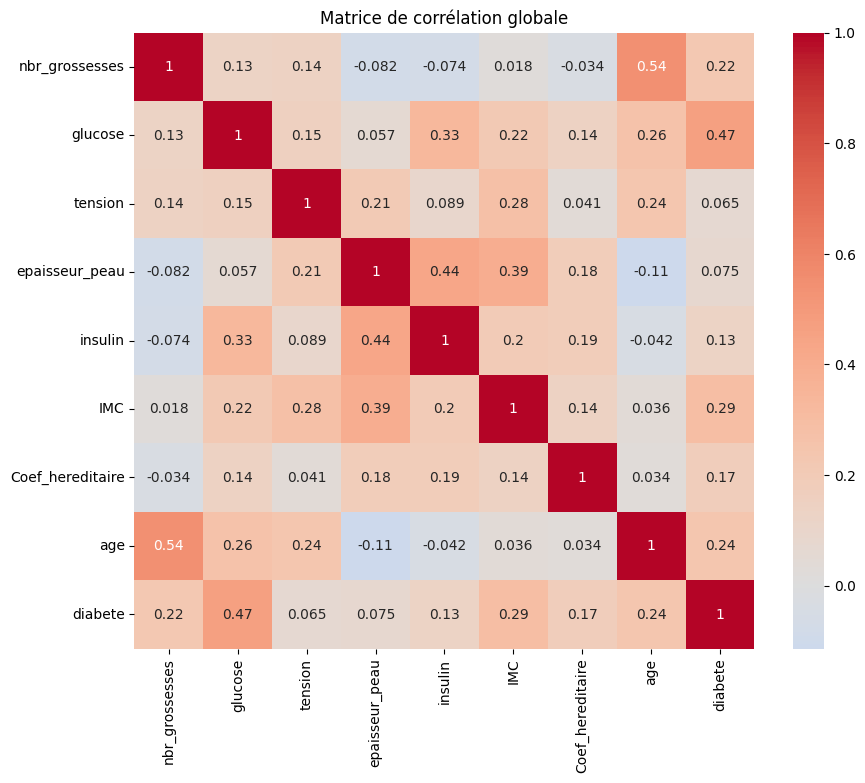

In [125]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()
# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation globale")
plt.show()

Partie 4 : Modélisation

Séparation des données

In [126]:
X = df.drop('diabete', axis=1)  # Supposons que 'Diabete' est la colonne cible
y = df['diabete']  # La colonne cible est 'Diabete'

# Diviser la base de données en test et entraînement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(X, y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

print('X_train taille :', X_train.shape)
print('X_test taille :', X_test.shape)
print('y_train taille :', y_train.shape)
print('y_test taille :', y_test.shape)

X_train taille : (614, 8)
X_test taille : (154, 8)
y_train taille : (614,)
y_test taille : (154,)


Application des algorithmes de Machine Learning

LogisticRegression :
Précision : 0.71
------------------------------
KNeighborsClassifier :
Précision : 0.67
------------------------------
DecisionTreeClassifier :
Précision : 0.73
------------------------------
RandomForestClassifier :
Précision : 0.76
------------------------------


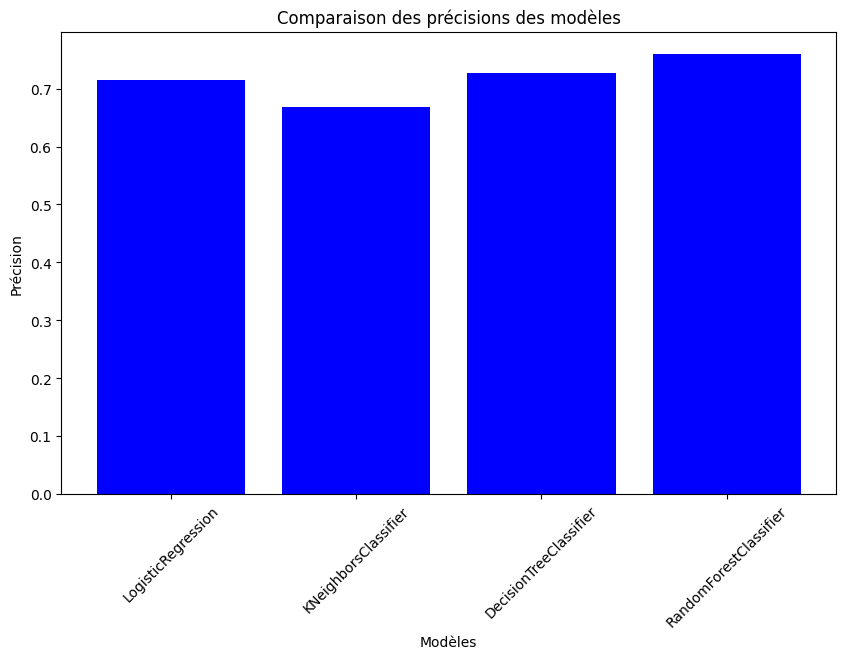

In [127]:
# Définition des modèles
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Fonction pour calculer la précision
def accury_true(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Fonction pour entraîner, évaluer les modèles et afficher un graphique
def train_test_eval(models, X_train, y_train, X_test, y_test):
    accuracies = []  # Liste pour stocker les précisions
    for name, model in models.items():
        print(f"{name} :")
        model.fit(X_train, y_train)  # Entraînement du modèle
        y_pred = model.predict(X_test)  # Prédiction sur les données de test
        accuracy = accury_true(y_test, y_pred)  # Calcul de la précision
        accuracies.append(accuracy)  # Ajout de la précision à la liste
        print(f"Précision : {accuracy:.2f}")
        print('-' * 30)

    # Tracer les précisions des modèles
    plt.figure(figsize=(10, 6))
    plt.bar(models.keys(), accuracies, color='blue')
    plt.xlabel('Modèles')
    plt.ylabel('Précision')
    plt.title('Comparaison des précisions des modèles')
    plt.xticks(rotation=45)
    plt.show()

# Appel de la fonction pour appliquer les modèles et afficher le graphique
train_test_eval(models, X_train, y_train, X_test, y_test)

Sélection du modèle choisi :RandomForestClassifier

In [128]:
X = df.drop('diabete', axis=1)  # 'Diabete' est la colonne cible
y = df['diabete']

# Séparation des données
X = df.drop('diabete', axis=1)  # 'Diabete' est la colonne cible
y = df['diabete']

# Séparation en ensembles d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition du modèle RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Entraînement du modèle avec les données d'entraînement
rf_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf_model.predict(X_test)

# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"La précision du modèle RandomForestClassifier est: {accuracy}")

# Rapport détaillé
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

La précision du modèle RandomForestClassifier est: 0.7662337662337663

Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154


Matrice de confusion :
[[83 16]
 [20 35]]


Évaluation du modèle : Calcul du taux d'erreur

In [129]:
# Calcul du taux d'erreur
error_rate = 1 - accuracy
print(f'Le taux d\'erreur du modèle est: {error_rate}')

Le taux d'erreur du modèle est: 0.23376623376623373


Déploiement du modèle

In [130]:
# Sauvegarde du modèle dans un fichier
joblib.dump(rf_model, 'random_forest_model.joblib')
print("Le modèle a été sauvegardé sous 'random_forest_model.joblib'.")

# Charger le modèle sauvegardé
model_loaded = joblib.load('random_forest_model.joblib')

# Vérification de la précision avec le modèle chargé
y_pred_loaded = model_loaded.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"La précision du modèle chargé est: {accuracy_loaded}")

# Exemple de nouvelles données pour prédiction (sans la colonne cible 'diabete')
new_data = pd.DataFrame({
    'nbr_grossesses': [5, 2],
    'glucose': [500, 60],
    'tension': [80, 60],
    'epaisseur_peau': [15, 0],
    'insulin': [300, 90],
    'IMC': [40.5, 10],
    'Coef_hereditaire': [0.2, 0.5],
    'age': [20, 60]
})

# Afficher les nouvelles données pour vérification
print("\nNouvelles données pour prédiction :")
display(new_data)

# Prédiction avec le modèle chargé sur les nouvelles données
new_predictions = model_loaded.predict(new_data)

# Affichage des prédictions
for i, prediction in enumerate(new_predictions):
    print(f"Prédiction pour la ligne {i+1} : {'Diabétique' if prediction == 1 else 'Non diabétique'}")


Le modèle a été sauvegardé sous 'random_forest_model.joblib'.
La précision du modèle chargé est: 0.7662337662337663

Nouvelles données pour prédiction :


,nbr_grossesses,glucose,tension,epaisseur_peau,insulin,IMC,Coef_hereditaire,age
0,5,500,80,15,300,40.5,0.2,20
1,2,60,60,0,90,10.0,0.5,60


Prédiction pour la ligne 1 : Diabétique
Prédiction pour la ligne 2 : Non diabétique


Installation de pypandoc pour la conversion de documents

In [131]:
import pypandoc
pypandoc.download_pandoc()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
